In [1]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old_model = ChoiceModel()

In [3]:
data = pd.DataFrame(columns=['series', 'period', 'CPR', 'ACI', 'MCP', 'NUM'])

In [4]:
series = 'true_data'
for period in range(1, 10):
    old_model.roll_back(period)
    CPR, ACI, MCP = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    data .loc[len(data)] = [series, period, CPR, ACI, MCP, num]
    old_model.visualize(
        file_name=f"experiments/old_graph/period_{period}.html")

In [5]:
true_max_CPR = data['CPR'].max()
true_min_CPR = data['CPR'].min()
true_max_ACI = data['ACI'].max()
true_min_ACI = data['ACI'].min()
true_max_MCP = data['MCP'].max()
true_min_MCP = data['MCP'].min()

In [6]:
series = 'sim_data'
for period in range(1, 10):
    file = f'experiments/{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file)
    num = len(list(new_model.graph.nodes))
    CPR, ACI, MCP = new_model.evaluate()
    data.loc[len(data)] = ['sim_baseline', period, CPR, ACI, MCP, num]

In [7]:
sim_data = data[data['series'] == 'sim_baseline']
sim_max_CPR = sim_data['CPR'].max()
sim_min_CPR = sim_data['CPR'].min()
sim_max_ACI = sim_data['ACI'].max()
sim_min_ACI = sim_data['ACI'].min()
sim_max_MCP = sim_data['MCP'].max()
sim_min_MCP = sim_data['MCP'].min()

In [8]:
series = 'remove_long_term'
for period in range(1, 10):
    file = f'experiments/{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file)
    num = len(list(new_model.graph.nodes))
    CPR, ACI, MCP = new_model.evaluate()
    data.loc[len(data)] = [series, period, CPR, ACI, MCP, num]

In [9]:
series = 'remove_short_term'
for period in range(1, 10):
    file = f'experiments/{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file)
    num = len(list(new_model.graph.nodes))
    CPR, ACI, MCP = new_model.evaluate()
    data.loc[len(data)] = [series, period, CPR, ACI, MCP, num]

In [10]:
series = 'remove_event'
for period in range(1, 10):
    file = f'experiments/{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file)
    num = len(list(new_model.graph.nodes))
    CPR, ACI, MCP = new_model.evaluate()
    data.loc[len(data)] = [series, period, CPR, ACI, MCP, num]

In [11]:
series = 'remove_media'
for period in range(1, 10):
    file = f'experiments/{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file)
    num = len(list(new_model.graph.nodes))
    CPR, ACI, MCP = new_model.evaluate()
    data.loc[len(data)] = [series, period, CPR, ACI, MCP, num]

In [12]:
true_data = data[data['series'] == 'true_data']
sim_data = data[data['series'] != 'true_data']
data.loc[true_data.index, 'norm_CPR'] = (
    true_data['CPR']-true_min_CPR)/(true_max_CPR-true_min_CPR)
data.loc[sim_data.index, 'norm_CPR'] = (
    sim_data['CPR']-sim_min_CPR)/(sim_max_CPR-sim_min_CPR)
data.loc[true_data.index, 'norm_ACI'] = (
    true_data['ACI']-true_min_ACI)/(true_max_ACI-true_min_ACI)
data.loc[sim_data.index, 'norm_ACI'] = (
    sim_data['ACI']-sim_min_ACI)/(sim_max_ACI-sim_min_ACI)
data.loc[true_data.index, 'norm_MCP'] = (
    true_data['MCP']-true_min_MCP)/(true_max_MCP-true_min_MCP)
data.loc[sim_data.index, 'norm_MCP'] = (
    sim_data['MCP']-sim_min_MCP)/(sim_max_MCP-sim_min_MCP)

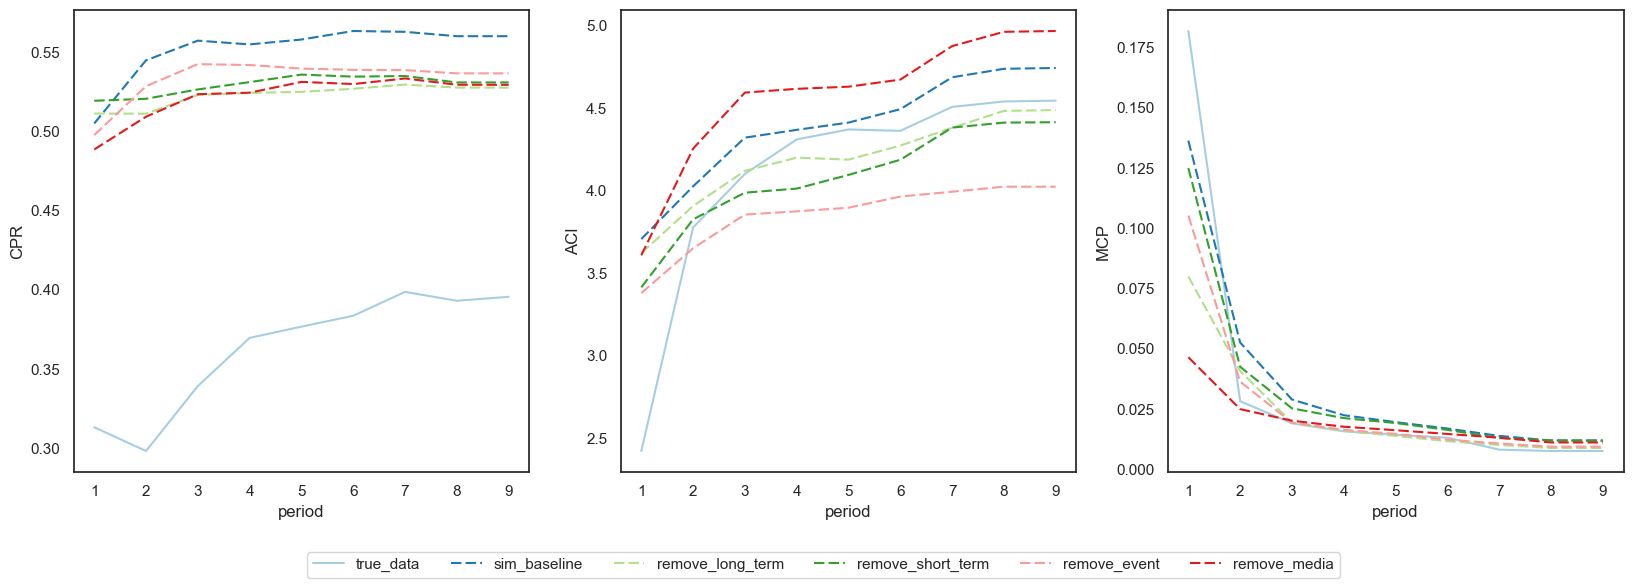

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

series = data['series'].unique().tolist()
line_styles = {k: [5, 2] for k in series}
line_styles['true_data'] = []

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='CPR', hue='series', style='series', dashes=line_styles, ax=ax[0],
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette=sns.color_palette(
                         "Paired")[:len(data['series'].unique())]
                     )
line2 = sns.lineplot(data=data, x='period', y='ACI', hue='series', style='series', dashes=line_styles, ax=ax[1],
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette=sns.color_palette(
                         "Paired")[:len(data['series'].unique())]
                     )
line3 = sns.lineplot(data=data, x='period', y='MCP', hue='series', style='series', dashes=line_styles, ax=ax[2],
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette=sns.color_palette(
                         "Paired")[:len(data['series'].unique())]
                     )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()


# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
fig.savefig("data1.png")
plt.show()

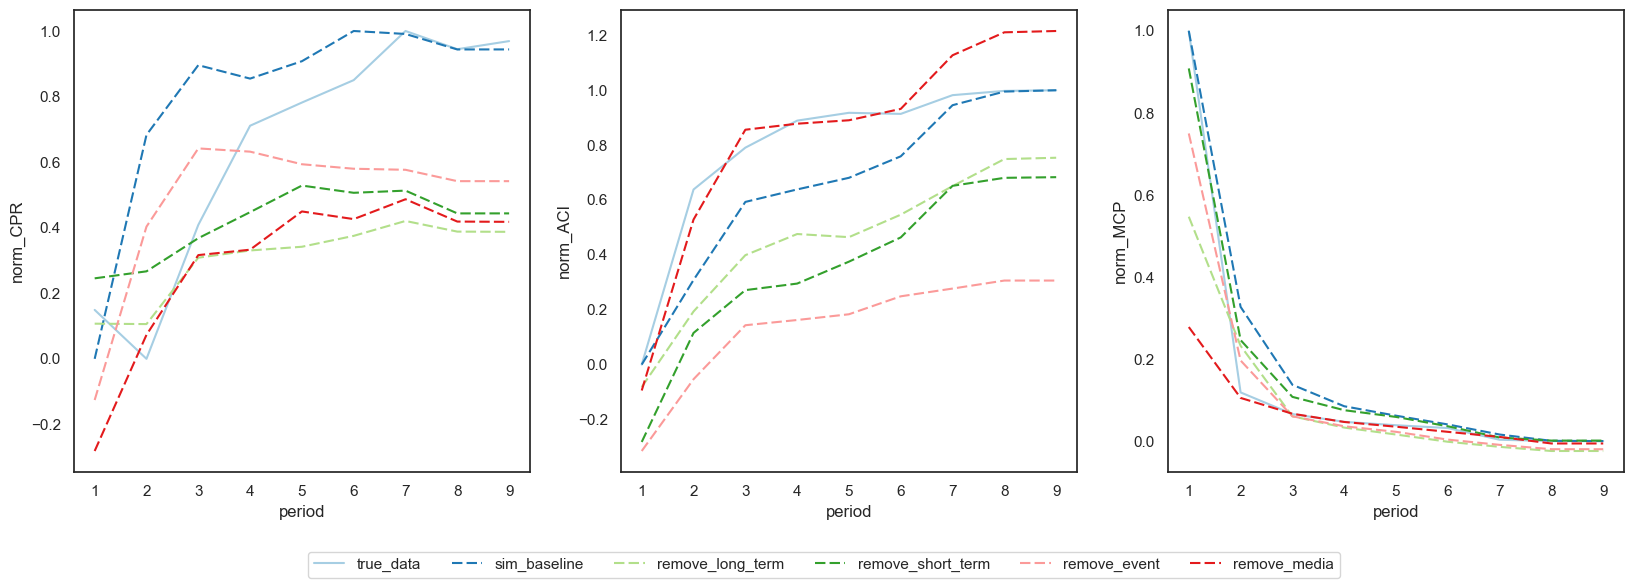

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

series = data['series'].unique().tolist()
line_styles = {k: [5, 2] for k in series}
line_styles['true_data'] = []

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='norm_CPR', hue='series', style='series', dashes=line_styles, ax=ax[0],
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette=sns.color_palette(
                         "Paired")[:len(data['series'].unique())]
                     )
line2 = sns.lineplot(data=data, x='period', y='norm_ACI', hue='series', style='series', dashes=line_styles, ax=ax[1],
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette=sns.color_palette(
                         "Paired")[:len(data['series'].unique())]
                     )
line3 = sns.lineplot(data=data, x='period', y='norm_MCP', hue='series', style='series', dashes=line_styles, ax=ax[2],
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette=sns.color_palette(
                         "Paired")[:len(data['series'].unique())]
                     )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
plt.show()

# Scatter Plot - Period 9


In [15]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
model = ChoiceModel()
graph = model.graph
actors = [a for a in graph.nodes() if graph.nodes[a]['type'] == 'Actors']
true_data = pd.DataFrame(columns=["actor_id", "age", "gender", "marrige",
                                  "withkids", "student", "workstatue", "residentinneighbor", "", "contribution", "participation", "series"])
for a in actors:
    contribution = graph.out_degree(a)
    participation = graph.in_degree(a)
    props = graph.nodes[a]['properties']
    age = props['age']
    gender = props['gender']
    marrige = props['marrige']
    withkids = props['withkids']
    student = props['student']
    workstatue = props['workstatue']
    residentinneighbor = props['residentinneighbor']
    educationlevel = props['educationlevel']
    true_data.loc[len(true_data)] = [a, age, gender, marrige, withkids, student, workstatue,
                                     residentinneighbor, educationlevel, contribution, participation, "true_data"]

true_data["norm_contribution"] = true_data["contribution"] / \
    true_data["contribution"].max()
true_data["norm_participation"] = true_data["participation"] / \
    true_data["participation"].max()

In [21]:
model = ChoiceModel(graph_path="experiments/sim_data/sim_data_9.pkl")
graph = model.graph
actors = [a for a in graph.nodes() if graph.nodes[a]['type'] == 'Actors']
sim_data = pd.DataFrame(columns=["actor_id", "age", "gender", "marrige",
                                 "withkids", "student", "workstatue", "residentinneighbor", "", "contribution", "participation", "series"])
for a in actors:
    contribution = graph.out_degree(a)
    participation = graph.in_degree(a)
    props = graph.nodes[a]['properties']
    age = props['age']
    gender = props['gender']
    marrige = props['marrige']
    withkids = props['withkids']
    student = props['student']
    workstatue = props['workstatue']
    residentinneighbor = props['residentinneighbor']
    educationlevel = props['educationlevel']
    sim_data.loc[len(sim_data)] = [a, age, gender, marrige, withkids, student, workstatue,
                                   residentinneighbor, educationlevel, contribution, participation, "sim_baseline"]

sim_data["norm_contribution"] = sim_data["contribution"] / \
    sim_data["contribution"].max()
sim_data["norm_participation"] = sim_data["participation"] / \
    sim_data["participation"].max()

In [22]:
data = pd.concat([true_data, sim_data], axis=0, ignore_index=True)

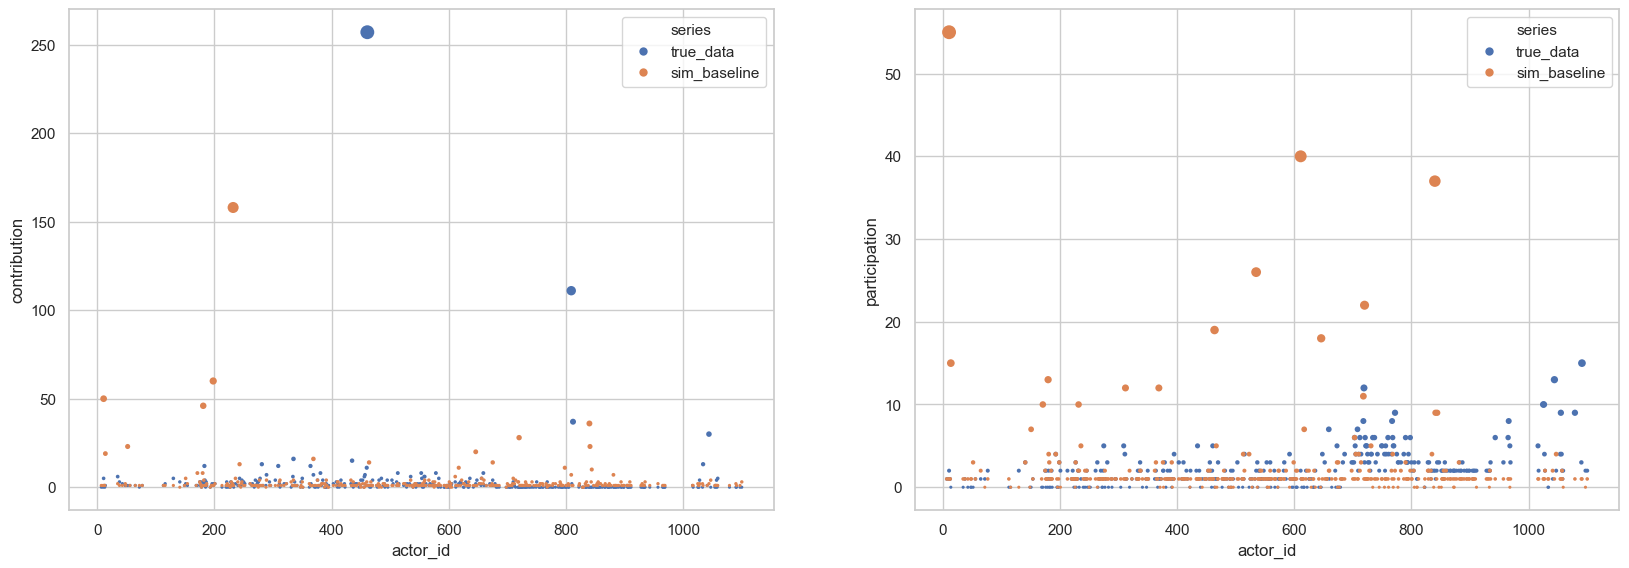

In [23]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6.5))
sns.set_theme(style="whitegrid")
# sns.despine(fig, left=True, bottom=True)
# Plot without size legend
scatter1 = sns.scatterplot(x="actor_id", y="contribution", size="contribution", hue="series",
                           sizes=(5, 100), linewidth=0, data=data, ax=ax[0])
scatter2 = sns.scatterplot(x="actor_id", y="participation", size="participation", hue="series",
                           sizes=(5, 100), linewidth=0, data=data, ax=ax[1])

# Get handles and labels from the first plot
handles, labels = scatter1.get_legend_handles_labels()
hue_handles = handles[:len(data['series'].unique())+1]
hue_labels = labels[:len(data['series'].unique())+1]
ax[0].legend().remove()
ax[1].legend().remove()

# Create a single legend for the series
ax[0].legend(hue_handles, hue_labels)
ax[1].legend(hue_handles, hue_labels)

# fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.show()

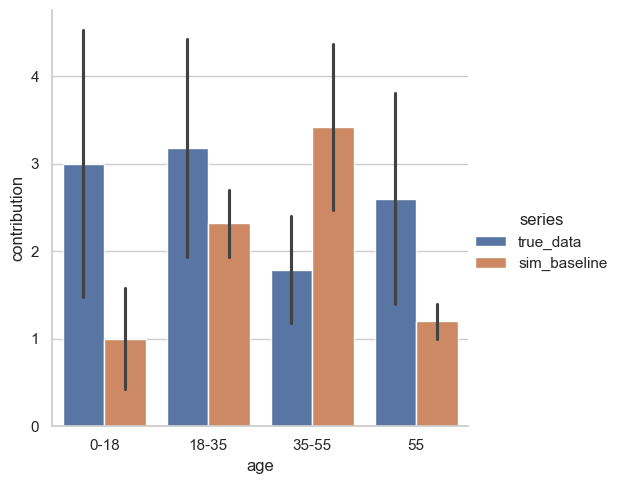

In [24]:
age_order = ['0-18', '18-35', '35-55', '55']
sns.catplot(data=data, x='age', y='contribution', hue='series', kind='bar', errorbar="se",
            order=age_order
            )
plt.show()

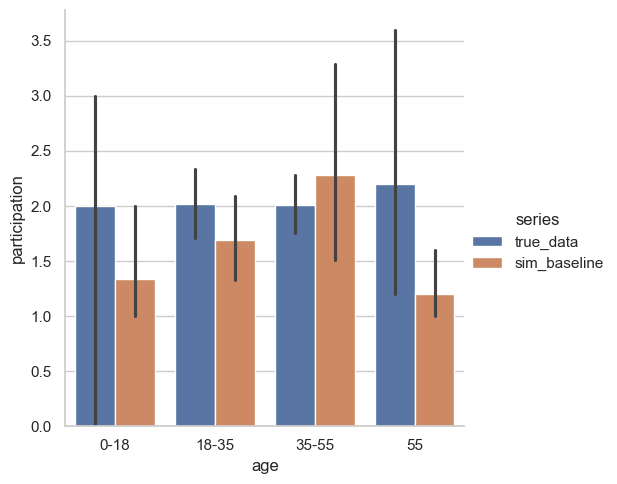

In [25]:
sns.catplot(data=data, x='age', y='participation',
            hue='series', kind='bar', order=age_order)
plt.show()